<div style="text-align: justify; padding:5px; background-color:rgb(252, 253, 255); border: 1px solid lightgrey; padding-left: 1em; padding-right: 1em;">
    <font color='red'>To begin: Click anywhere in this cell and press <kbd>Run</kbd> on the menu bar. This executes the current cell and then highlights the next cell. There are two types of cell. A <i>text cell</i> and a <i>code cell</i>. When you <kbd>Run</kbd> a text cell (<i>we are in a text cell now</i>), you advance to the next cell without executing any code. When you <kbd>Run</kbd> a code cell (<i>identified by <span style="font-family: courier; color:black; background-color:white;">In[ ]:</span> to the left of the cell</i>) you advance to the next cell after executing all the Python code within that cell. Any visual results produced by the code (text/figures) are reported directly below that cell. Press <kbd>Run</kbd> again. Repeat this process until the end of the notebook. <b>NOTE:</b> All the cells in this notebook can be automatically executed sequentially by clicking <kbd>Kernel</kbd><font color='black'>→</font><kbd>Restart and Run All</kbd>. Should anything crash then restart the Jupyter Kernel by clicking <kbd>Kernel</kbd><font color='black'>→</font><kbd>Restart</kbd>, and start again from the top.
        
</div>


<div style="background-color:rgb(255, 250, 250); padding:5px; padding-left: 1em; padding-right: 1em;">

<h1 id="tutorial1" style="text-align: justify">Tutorial: NMR and LC-MS Metabolomics Data Analysis Workflow</h1>

<p style="text-align: justify"><br>  
</div>

<p  style="text-align: justify">
This Jupyter notebook uses Python and R language and describes a typical metabolomics data analysis workflow for a study with a binary classification outcome. The main steps included are: </p>

<ul>

#### Part 1: LC-MS Quality Control analysis

#### Part 2: LC-MS and NMR multivariate data analysis and data vizualisation:
<li style="text-align: justify">Import metabolite &amp; experimental data from an Excel sheet. </li>

<li style="text-align: justify">Pooled QC-based data cleaning.</li>

<li style="text-align: justify">Principal Component Analysis visualisation to check data quality.</li>

<li style="text-align: justify">Two-class univariate statistics.</li>

<li style="text-align: justify">Multivariate analysis using Partial Least Squares Discriminant Analysis (PLS-DA) including:


<ul>
<li style="text-align: justify">model optimisation (R<sup>2</sup> vs Q<sup>2</sup>).</li>

<li style="text-align: justify">permutation testing, model prediction metrics.</li>

<li style="text-align: justify">feature importance.</li>

<li style="text-align: justify">model prediction data visualisations.</li></ul>
</li>

<li style="text-align: justify">Export statistical tables to Excel sheets.</li>
</ul>

<p style="text-align: justify">The study used in this tutorial has been previously published as an open access article <a href="https://www.nature.com/articles/bjc2015414">Chan et al. (2016)</a>, in the British Journal of Cancer, and the deconvolved and annotated data file deposited at the <a href="http://www.metabolomicsworkbench.org">Metabolomics Workbench data repository</a> (Project ID PR000699). The data can be accessed directly via its project <a href="http://dx.doi.org/DOI:10.21228/M8B10B">DOI:10.21228/M8B10B</a> <sup>1</sup>H-NMR spectra were acquired at Canada’s National High Field Nuclear Magnetic Resonance Centre (NANUC) using a 600 MHz Varian Inova spectrometer. Spectral deconvolution and metabolite annotation was performed using the <a href="https://www.chenomx.com/software/">Chenomx NMR Suite v7.6</a>. Unfortunately, the Raw NMR data is unavailable.</p>
</div></div>

<p style="text-align: justify">This notebook is based on the Metabolomics workflow tutorial part of the following review: <br>
     <a href="https://doi.org/10.1007/s11306-019-1588-0"> "Toward collaborative open data science in metabolomics using Jupyter Notebooks and cloud computing"<br>
    <a href="https://github.com/CIMCB/MetabWorkflowTutorial"> All the original notebooks are available here <br>
</p>


# Part 1: Quality Control Analysis

## 1.  Import Data

1. Import the `pandas` python module and name it `pd`
2. Load the Excel sheet "Data" from Excel file "data.xlsx" into a dataframe called `data`.
3. Display the number of rows and columns in `data`.
4. Display the first 10 rows at the top (head) of the `data` table.
5. Load the Excel sheet "Peak" from Excel file "data.xlsx" into a dataframe called `peak`.
6. Display the number of rows and columns in `peak`.
7. Display the first 10 rows at the top (head) of the `peak` table.

In [1]:
import pandas as pd

data = pd.read_excel('data.xlsx', sheet_name='Data') 
print("Data Table: {} rows & {} columns".format(*data.shape))
display(data.head(10)) # View data table (top 10 rows)

peak = pd.read_excel('data.xlsx', sheet_name='Peak') 
print("Peak Table: {} rows & {} columns".format(*peak.shape))
display(peak.head(10))

Data Table: 91 rows & 3087 columns


,Order,SampleType,QC,M1,M2,M3,M4,M5,M6,M7,...,M3075,M3076,M3077,M3078,M3079,M3080,M3081,M3082,M3083,M3084
0,1,QC,1,1.837062e+08,1.296528e+08,3.961182e+07,3.732578e+07,5.339865e+06,1.031822e+08,9.409682e+06,...,35153.206002,15735.886504,24928.165047,30134.444665,3035.247672,18271.101975,20981.783849,3523.418763,23752.440055,17161.698785
1,2,QC,1,2.030571e+08,1.178121e+08,6.361418e+07,6.682747e+07,5.572493e+06,9.366510e+07,9.941482e+06,...,36701.059662,15590.522963,24776.756320,30250.013996,3052.288747,22116.296519,24543.382677,3389.677457,24262.317947,18949.290754
2,3,Sample,0,1.285728e+08,2.726444e+08,4.611692e+07,4.717621e+07,3.178726e+06,8.077425e+07,6.924520e+06,...,43120.310719,16378.981747,28627.451582,31297.776297,1738.358685,17695.679626,16703.470005,1113.489872,29717.457693,14683.792853
3,4,Sample,0,1.491128e+08,1.955086e+08,5.212802e+07,5.114760e+07,3.428193e+06,8.211311e+07,7.416907e+06,...,44663.545552,17429.459487,25703.703594,26399.809078,846.020446,15306.546820,15198.095655,1137.752119,26610.868749,11913.223789
4,5,Sample,0,1.590268e+08,3.780061e+08,4.238071e+07,4.282051e+07,3.186309e+06,1.000761e+08,7.030797e+06,...,41770.351723,18467.519040,27371.393974,28374.785933,1959.397898,14904.243032,15625.089253,1101.738536,26496.665356,12750.259715
5,6,Sample,0,1.875314e+08,7.153474e+07,5.007826e+07,5.036435e+07,4.849348e+06,9.998757e+07,1.039036e+07,...,41616.726360,11426.528395,23313.373795,28582.727888,872.115128,15301.063816,14321.556052,1030.238432,32587.650554,18655.811727
6,7,QC,1,1.983585e+08,1.204062e+08,5.190127e+07,5.180519e+07,5.348706e+06,8.966852e+07,9.605938e+06,...,32839.675140,16262.163327,21298.643088,28065.010551,3277.276918,20071.616958,18198.098904,3047.831055,24997.154651,14494.628663
7,8,Sample,0,1.460268e+08,2.274148e+08,5.872350e+07,5.581725e+07,4.342786e+06,1.059740e+08,1.401639e+07,...,35339.968664,25426.050392,51819.646796,21762.932664,1822.815140,23457.954245,23651.858710,1210.741328,22834.426860,15771.899526
8,9,Sample,0,1.381372e+08,1.269111e+08,5.276344e+07,4.936756e+07,3.005090e+06,8.101362e+07,1.484466e+07,...,33766.256647,15963.341703,50651.507533,18503.876558,843.925809,16572.962662,16625.898352,1186.166100,25623.108950,13811.758227
9,10,Sample,0,1.601298e+08,4.347327e+08,4.883041e+07,4.518047e+07,3.326398e+06,7.714394e+07,1.239396e+07,...,31442.161072,22600.725041,51901.700174,16804.403434,1522.101762,19948.743747,22690.058851,1229.664436,22637.770945,15009.816887


Peak Table: 3084 rows & 6 columns


,Idx,Name,Mol_Weight,RT_minutes,RSD,D_Ratio
0,1,M1,113.05902,1.276,5.012937,0.28
1,2,M2,203.11564,0.950,9.557013,0.19
2,3,M3,161.10514,1.428,16.085023,0.26
3,4,M4,129.07893,1.400,18.035797,0.49
4,5,M5,161.10510,1.272,19.515359,0.40
5,6,M6,225.94404,5.923,6.510319,0.33
6,7,M7,194.08026,1.169,2.890900,0.03
7,8,M8,115.06345,7.067,4.733385,0.16
8,9,M9,131.09461,6.220,6.138996,0.33
9,10,M10,117.07900,6.971,4.783892,0.32


## 2. Histogram of RSD

1. Import the `matplotlib.pyplot` visualisation package and name it `plt`
2. Invoke the special "Jupyter Magic" command `%matplotlib inline` to help simplify plotting
2. Create a histogram of the column `peak.RSD`
3. Add an x-axis label "RSD" to the figure
4. Generate the figure using the function `plt.show()`

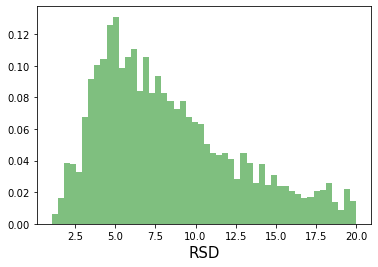

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline 

plt.hist(peak.RSD, 50, density=True, facecolor='g', alpha=0.5) 
plt.xlabel('RSD', fontsize=15)
plt.show()

## 3. Jointplot of RSD vs. D-Ratio

1. Import the `seaborn` visualisation package and name it `sns`
2. Create a plot of `peak` columns `peak.RSD` vs. `peak.D-Ratio` with bivariate and distribution graphs. (automatically displayed)

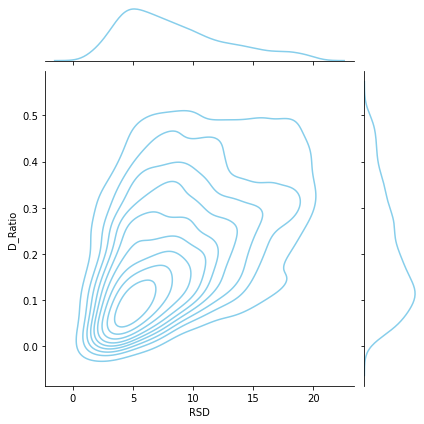

In [3]:
import seaborn as sns

sns.jointplot(x=peak.RSD, y=peak.D_Ratio, kind='kde', color="skyblue") 

## 4. PCA score plot of QC vs. Sample

1. Import the packages required to calculate the principal component analysis (PCA)
    - `numpy` (import as `np`)
    - `scikit-learn` packages `sklearn.decomposition.PCA`, `sklearn.preprocessing.StandardScaler`
2. Import the matplotlib package required to map colours to datapoints, to plot the PCA scores
    - `matplotlib.colors.ListedColormap`
3. Scale the data and calculate the PCA.
4. Plot PCA scores (pc1 vs pc2) labeling/coloring samples by 'QC' or 'Sample'

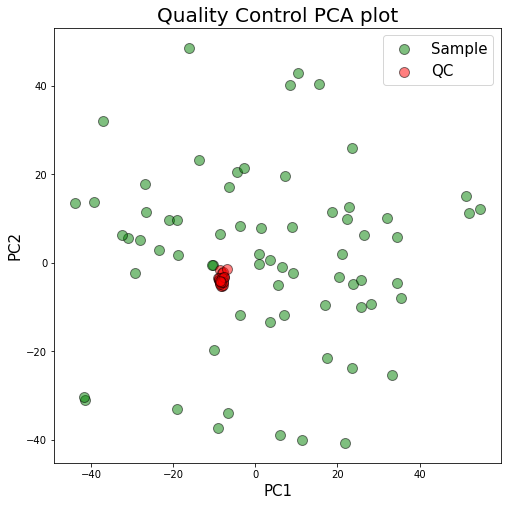

In [4]:
# Import
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap

# Extract X matrix
names = peak['Name']
x = data[names].values
x = np.log(x)
x = StandardScaler().fit_transform(x)

# Create and fit PCA
pca = PCA(n_components=2)
scores = pca.fit_transform(x)
label = data['SampleType']

# Split scores into sample and QC
Sample_scores = scores[label == 'Sample',:]
QC_scores = scores[label == 'QC',:]

# Plot Sample score and QC score
fig = plt.figure(figsize=(8,8))
h1 = plt.scatter(Sample_scores[:,0],Sample_scores[:,1],edgecolors='Black', facecolors='Green',s=100,alpha=0.5)
h2 = plt.scatter(QC_scores[:,0],QC_scores[:,1], edgecolors='Black', facecolors='Red',s=100,alpha=0.5)

# Add legend, labels, and title
plt.legend((h1,h2),('Sample','QC'),fontsize=15)
plt.xlabel('PC1', fontsize=15)
plt.ylabel('PC2', fontsize=15)
plt.title('Quality Control PCA plot',fontsize=20)

# Show plot
plt.show()

## 5. Bubble plot of Molecular Weights vs. Retention Time (sized by RSD)

1. Create a scatterplot of two `peak` columns: `peak.Mol_Weight` vs. `peak.RT_minutes` (each dot is a metabolite peak).
    - make the size of the dots proportional to the RSD of the datapoint with the argument `s=peak.RSD**2/2`
    - make the dots (bubbles) transparent with the argument `alpha=0.2`
2. Add x-axis label "Molecular Weight", and y-axis label "RT minutes"
3. Add a plot title
4. Render the plot

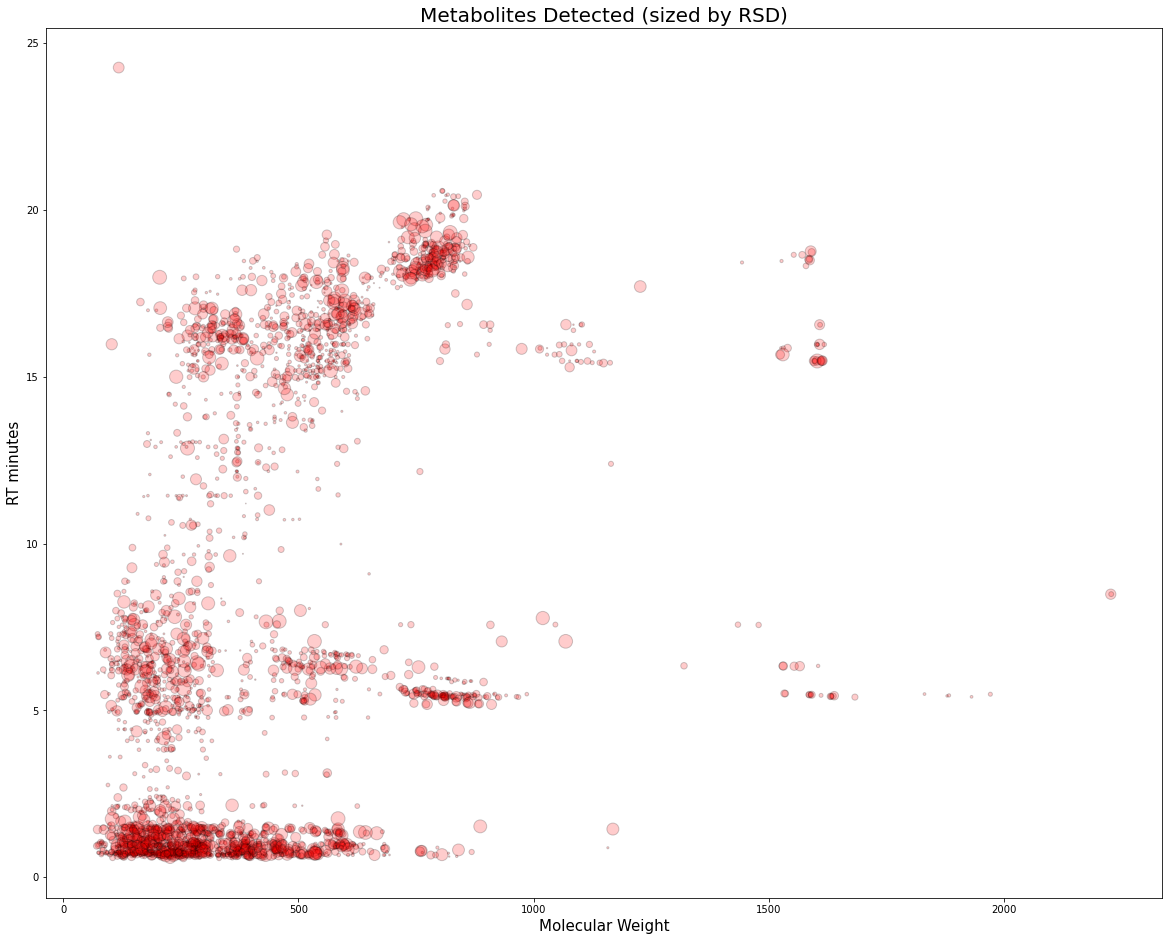

In [5]:
# Scatterplot of Mol_Weight vs. RT_minute with size RSD^2/2, and colour red
fig = plt.figure(figsize=(20,16))
plt.scatter(peak.Mol_Weight, peak.RT_minutes, s=peak.RSD**2/2, alpha=0.2, edgecolors='black', c='red') 
plt.xlabel('Molecular Weight', fontsize=15)
plt.ylabel('RT minutes', fontsize=15)
plt.title('Metabolites Detected (sized by RSD)',fontsize=20)
plt.show()

#####################################################################################################################################################################

# Part 2: LC-MS and NMR multivariate data analysis and data vizualisation:

<div style="background-color:rgb(255,210,210); padding:5px;  border: 10px solid rgb(255, 250, 250); padding-right: 1em;">
<img align="left" width="40" src="images/cog2.png">
<div style="padding-left:80px; text-align: justify">
<b style="text-align: justify">Red boxes (cog icon) provide suggestions for changing the functionality of the subsequent code cell by editing (or substituting) one or more lines of code / Make sure to use these instructions during the second analysis round using LC-MS</b><br>
</div></div>

<div style="background-color:rgb(210,250,210); padding:5px;  border: 10px solid rgb(255, 250, 250); padding-right: 1em;">
<img align="left" width="40" src="images/mouse.png">
<div style="padding-left:80px; text-align: justify">
<b style="text-align: justify"> Green boxes (mouse icon) provide suggestions for interacting with the visual results generated by a code cell. For example, the first green box in the notebook describes how to sort and colour data in the embedded data tables.</b><br>
</div></div>

<div style="background-color:rgb(210,250,255); padding:5px;  border: 10px solid rgb(255, 250, 250); border-bottom: 10px solid rgb(255, 250, 250); padding-right: 1em;">
<img align="left" width="40" src="images/bulb.png">
<div style="padding-left:80px; text-align: justify">
<b style="text-align: justify">Blue boxes (lightbulb icon) provide further information about the theoretical reasoning behind a block of code or visualisation. This information is not essential to understand Jupyter notebooks but may be of general educational utility and interest to new metabolomics data scientists.</b><br>
</div></div>



<div style="background-color:rgb(255, 250, 250); padding:2px; padding-left: 1em; padding-right: 1em;">
    
<h2 id="1importpackagesmodules" style="text-align: justify">1. Import Packages/Modules</h2>

<p style="text-align: justify">The first code cell of this tutorial (below this text box) imports <a href="https://docs.python.org/3/tutorial/modules.html"><em>packages</em> and <em>modules</em></a> into the Jupyter environment. <em>Packages</em> and <em>modules</em> provide additional functions and tools that extend the basic functionality of the Python language.
<br></p>
</div>

<div style="background-color:rgb(210,250,255); padding:2px; border: 20px solid rgb(255, 250, 250); padding-right: 1em;">
<img align="left" width="80" src="images/bulb.png">
<div style="padding-left:80px; text-align: justify">

<ul>
<li style="text-align: justify">All the code embedded in this example notebook is written using the Python programming language (<a href="http://www.python.org">python.org</a>) and is based upon extensions of popular open source packages with high levels of support. 
    
<em>Note:</em> a tutorial on the python programming language in itself is beyond the scope of this notebook. For more information on using Python and Jupyter Notebooks please refer to the excellent: 
<a href="https://mybinder.org/v2/gh/jakevdp/PythonDataScienceHandbook/master?filepath=notebooks%2FIndex.ipynb">Python Data Science Handbook (Jake VanderPlas, 2016)</a>, which is in itself a Jupyter Notebook deployed via <a href="https://mybinder.org">Binder</a>.</li>
</ul>
</div> </div>
<div style="background-color:rgb(255, 250, 250); padding:5px; padding-left: 1em; padding-right: 1em;">
    
<p style="text-align: justify">The first code cell of this tutorial (below this text box) imports <a href="https://docs.python.org/3/tutorial/modules.html"><em>packages</em> and <em>modules</em></a> into the Jupyter environment. <em>Packages</em> and <em>modules</em> provide additional functions and tools that extend the basic functionality of the Python language. We will need the following tools  to analyse the data in this tutorial:<br></p>

<ul>
<li style="text-align: justify"><a href="http://www.numpy.org/"><code>numpy</code></a>: the fundamental package for scientific computing with Python, providing tools to work with arrays and linear algebra</li>

<li style="text-align: justify"><a href="https://pandas.pydata.org/"><code>pandas</code></a>: provides high-performance, easy-to-use data structures and data analysis tools</li>

<li style="text-align: justify"><a href="http://beakerx.com/"><code>beakerx</code></a>: provides interactive tools for the Jupyter notebook environment</li>

<li style="text-align: justify"><a href="https://scikit-learn.org/stable/"><code>sklearn</code></a>: tools for machine learning in Python


<ul>
<li style="text-align: justify"><a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html"><code>train_test_split</code></a>: a method to split arrays into random test/training subsets for cross-validation</li></ul>
</li>

<li style="text-align: justify"><a href="https://github.com/KevinMMendez/cimcb_lite"><code>cimcb_lite</code></a>: a library of helpful functions provided by the authors</li>
</ul>

<p style="text-align: justify"><strong>Run the cell by clicking anywhere in the cell (the cell will be surrounded by a blue box) and then clicking <kbd>Run</kbd> in the Menu.</strong> <br>
When successfully executed the cell will print <code>All packages successfully loaded</code> in the notebook below the cell.</p>
</div>


In [6]:
import numpy as np
import pandas as pd

from beakerx.object import beakerx
from sklearn.model_selection import train_test_split

import cimcb_lite as cb

beakerx.pandas_display_table()  # by default display pandas tables as BeakerX interactive tables

print('All packages successfully loaded')

All packages successfully loaded


<div style="background-color:rgb(255, 250, 250); padding:5px; padding-left: 1em; padding-right: 1em;">

<h2 id="2loaddataandpeaksheet" style="text-align: justify">2. Load Data and Peak sheet</h2>

<p style="text-align: justify">The code cell below loads the <em>Data</em> and <em>Peak</em> sheets from an Excel file, using the CIMCB helper function <code>load_dataXL()</code>. When this is complete, you should see confirmation that Peak (stored in the <code>Peak</code> worksheet in the Excel file) and Data (stored in the <code>Data</code> worksheet in the Excel file) tables have been loaded.<br></p>

<p style="text-align: justify">This workflow requires data to be uploaded as a Microsoft Excel file, using the <a href="https://en.wikipedia.org/wiki/Tidy_data">Tidy Data</a> framework (i.e. each column is a variable, and row is an observation). As such, the Excel file should contain a <em>Data Sheet</em> and <em>Peak Sheet</em>. The <em>Data Sheet</em> contains all the metabolite concentrations and metadata associated with each observation (requiring the inclusion of the columns: <em>Idx</em>, <em>SampleID</em>, and <em>Class</em>). The <em>Peak Sheet</em> contains all the metadata pertaining to each measured metabolite (requiring the inclusion of the columns: <em>Idx</em>, <em>Name</em>, and <em>Label</em>). Please inspect the <a href="GastricCancer_NMR.xlsx">Excel file</a> used in this tutorial before proceeding. </p>

<p style="text-align: justify">The code cell below loads the <em>Data</em> and <em>Peak</em> sheets from an Excel file, using the CIMCB helper function <code>load_dataXL()</code>. When this is complete, you should see confirmation that Peak (stored in the <code>Peak</code> worksheet in the Excel file) and Data (stored in the <code>Data</code> worksheet in the Excel file) tables have been loaded:</p>

<pre style="text-align: justify"><code class="text language-text">Loadings PeakFile: Peak
Loadings DataFile: Data
Data Table &amp; Peak Table is suitable.
TOTAL SAMPLES: 140 TOTAL PEAKS: 149
Done!
</code></pre>

<p style="text-align: justify">Once loaded, the data is available for use in <a href="https://swcarpentry.github.io/python-novice-gapminder/02-variables/"><em>variables</em></a> called <code>dataTable</code> and <code>peakTable</code>.</p>
</div>

<div style="background-color:rgb(255,210,210); padding:2px; border: 20px solid rgb(255, 250, 250); padding-right: 1em;">
<img align="left" width="80" src="images/cog2.png">
<div style="padding-left:80px; text-align: justify"> 

<ul>
<li style="text-align: justify">There is a second datase included with this  tutorial which has been converted to standardised <a href="https://en.wikipedia.org/wiki/Tidy_data">Tidy Data</a> format. This data has been previously published as an article <a href="https://link.springer.com/article/10.1007%2Fs11306-016-1059-9">Gardlo et al. (2016)</a> in  <i>Metabolomics</i>. 
    
Urine samples collected from newborns with perinatal asphyxia were analysed using a Dionex UltiMate 3000 RS system coupled to a triple quadrupole QTRAP 5500 tandem mass spectrometer. The deconvoluted and annotated file is deposited at the <a href="https://www.ebi.ac.uk/metabolights/">Metabolights</a> data repository (Project ID <a href="https://www.ebi.ac.uk/metabolights/MTBLS290">MTBLS290</a>). 

Please inspect the <a href="MTBLS290db.xlsx">Excel file</a> before using it in this tutorial. To change the data set to be loaded into the notebook remove the <code>#</code> before <code>filename</code>,and press <mark><kbd>Run</kbd></mark> on the menu bar.

<b>Note: if you change the name of the file in this code cell, you will also have to make changes to <a href=#5>Section 5</a> and <a href=#6>Section 6</a> (as indicated in the text cell above each) for the correct models to be built. It is probably best to come back to this excercise after finishing an initial walk-through of the complete tutorial using the default data set.</b></li>
</ul>
</div></div>

<h3 id="run2NMR" style="text-align: justify">Important for the second analysis round when you will use LC-MS make sure to change the filename from the NMR</h3>

In [7]:
# The path to the input file (Excel spreadsheet)
# Choose between NMR or LC-MS data - LC-MS is the default here
filename = 'GastricCancer_NMR.xlsx'

#filename = 'MTBLS290db.xlsx' # To use the LC-MS data instead of NMR remove the # before filename

# Load Peak and Data tables into two variables
dataTable, peakTable = cb.utils.load_dataXL(filename, DataSheet='Data', PeakSheet='Peak') 

Loadings PeakFile: Peak
Loadings DataFile: Data


/home/thomas/anaconda3/lib/python3.7/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


Data Table & Peak Table is suitable.
TOTAL SAMPLES: 140 TOTAL PEAKS: 149
Done!


<div style="background-color:rgb(255, 250, 250); padding:2px; padding-left: 1em; padding-right: 1em;">
<h3 id="21displaythedatatable" style="text-align: justify">2.1 Display the <code>Data</code> table</h3>

<p style="text-align: justify">The <code>dataTable</code> table can be displayed interactively so we can inspect and check the imported values. To do this, we use the <code>display()</code> function.
<br></p>
<p style="text-align: justify">Note that each row describes a single urine sample, where:</p>
<ul>
    <li style="text-align: justify">Columns <b>M1</b> ... <b>M149</b> descibe metabolite concentrations.</li>
    <li style="text-align: justify">Column <b>SampleType</b> indicates whether the sample was a pooled QC or a study sample.</li>
    <li style="text-align: justify">Column <b>Class</b> indicates the clincal outcome observed for that individual: <i>GC</i> = Gastric Cancer , <i>BN</i> = Benign Tumor , <i>HE</i> = Healthy Control</li>
</ul>
</div>
<div style="background-color:rgb(210,250,210); padding:2px; border: 20px solid rgb(255, 250, 250); padding-right: 1em;">
<img align="left" width="60" src="images/mouse.png">
<div style="padding-left:80px; text-align: justify">

<ul>
<li style="text-align: justify">Scroll up/down &amp; left/right using the scroll bars</li>
<li style="text-align: justify">Click on any column header to sort by that column (sort alternates between ascending and decending order)</li>
<li style="text-align: justify">Click on the left side of a header column for futher options 
<ul>
<li style="text-align: justify">for column <b>Class</b> click on <i>'color by unique'</i></li>
<li style="text-align: justify">for column <b>SampleType</b> click on <i>'sort ascending'</i> to group all the <em>QC</em> samples together.</li></ul>
</li>
<li style="text-align: justify">Click on column header <b>index</b> to sort back into the orginal order.</li>
</ul>
</div></div>

In [8]:
display(dataTable) # View and check the dataTable 

AttributeError: 'Series' object has no attribute 'get_values'

,Idx,SampleID,SampleType,Class,M1,M2,M3,M4,M5,M6,...,M140,M141,M142,M143,M144,M145,M146,M147,M148,M149
1,1,sample_1,QC,QC,90.1,491.6,202.9,35.0,164.2,19.7,...,115.1,64.8,25.5,473.9,26.5,NaN,6.8,118.6,710.6,203.6
2,2,sample_2,Sample,GC,43.0,525.7,130.2,NaN,694.5,114.5,...,84.2,357.1,16.1,455.5,29.5,28.1,35.8,316.1,390.7,199.0
3,3,sample_3,Sample,BN,214.3,10703.2,104.7,46.8,483.4,152.3,...,993.5,1698.5,32.9,75.9,33.2,802.8,967.6,154.4,31.6,195.2
4,4,sample_4,Sample,HE,31.6,59.7,86.4,14.0,88.6,10.3,...,58.1,83.5,60.5,136.9,17.0,10.2,24.7,64.1,91.4,91.6
5,5,sample_5,Sample,GC,81.9,258.7,315.1,8.7,243.2,18.4,...,44.5,47.6,45.6,1441.7,35.2,0.1,22.8,135.0,322.3,254.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,136,sample_136,QC,QC,97.6,341.1,232.1,38.1,174.0,7.7,...,79.7,101.8,23.9,296.0,25.0,NaN,7.5,141.5,675.7,200.8
137,137,sample_137,Sample,GC,405.3,510.7,521.9,91.9,732.1,145.7,...,434.8,84.8,182.3,110.7,123.9,0.4,36.3,60.1,317.3,401.7
138,138,sample_138,Sample,BN,45.4,191.6,41.0,18.7,40.8,32.2,...,45.3,44.5,14.5,83.8,27.9,0.3,0.5,47.3,47.8,46.5
139,139,sample_139,Sample,HE,30.7,56.8,35.9,20.9,17.4,NaN,...,28.0,38.7,1.3,130.9,24.6,0.7,5.9,20.7,124.1,28.9


<div style="background-color:rgb(255, 250, 250); padding:5px; padding-left: 1em; padding-right: 1em;">

<h3 id="22displaythepeaksheet" style="text-align: justify">2.2. Display the <code>Peak</code> sheet</h3>

<p style="text-align: justify">The <code>peakTable</code> table can also be displayed interactively so we can inspect and check the imported values. To do this, we again use the <code>display()</code> function. For this example the imported data consists of 149 metabolites (the same as in the <code>dataTable</code> data)</p>

<p style="text-align: justify">Each row describes a single metabolite, where</p>

<ul>
<li style="text-align: justify">Column <strong>Idx</strong> is a unique metabolite index.</li>

<li style="text-align: justify">Column <strong>Name</strong> is the column header corresponding to this metabolite in the <code>dataTable</code> table.</li>

<li style="text-align: justify">Column <strong>Label</strong> provides a unique name for the metabolite (or a <code>uNNN</code> identifier)</li>

<li style="text-align: justify">Column <strong>Perc_missing</strong> indicates what percentage of samples do not contain a measurement for this metabolite (missing data). </li>

<li style="text-align: justify">Column <strong>QC_RSD</strong> is a quality score representing the variation in measurements of this metabolite across all samples. </li>


</div>

<div style="background-color:rgb(210,250,210); padding:2px; border: 20px solid rgb(255, 250, 250); padding-right: 1em;">
<img align="left" width="60" src="images/mouse.png">
<div style="padding-left:80px"> 

<ul>
<li style="text-align: justify">Click on the column header <strong>QC_RSD</strong> to sort the peaks by ascending value</li>
<li style="text-align: justify">Click on the left edge of the column header <strong>QC_RSD</strong> and select <em>'heatmap'</em></li>
<li style="text-align: justify">Scroll up/down to see how the "quality" of the peaks increase/decrease</li>
</ul>
</div></div>

In [9]:
display(peakTable) # View and check PeakTable

AttributeError: 'Series' object has no attribute 'get_values'

,Idx,Name,Label,Perc_missing,QC_RSD
1,1,M1,1_3-Dimethylurate,11.428571,32.208005
2,2,M2,1_6-Anhydro-β-D-glucose,0.714286,31.178028
3,3,M3,1_7-Dimethylxanthine,5.000000,34.990605
4,4,M4,1-Methylnicotinamide,8.571429,12.804201
5,5,M5,2-Aminoadipate,1.428571,9.372664
...,...,...,...,...,...
145,145,M145,uarm1,23.571429,41.406985
146,146,M146,uarm2,4.285714,34.458172
147,147,M147,β-Alanine,1.428571,27.623517
148,148,M148,π-Methylhistidine,1.428571,16.561921


<div style="background-color:rgb(255, 250, 250); padding:10px;  padding-left: 1em; padding-right: 1em;">

<h2 id="3datacleaning" style="text-align: justify">3. Data Cleaning</h2>
<p style="text-align: justify">It is good practice to assess the quality of your data, and remove (clean out) any poorly measured metabolites, before performing any statistical or machine learning modelling <a href="https://link.springer.com/article/10.1007/s11306-018-1367-3">Broadhurst <em>et al.</em> 2018</a>.</a> For the Gastric Cancer NMR data set used in this example we have already calculated some basic statistics for each metabolite and stored them in the Peak table. In this notebook we keep only metabolites that meet the following criteria:</p>

<ul>
<li style="text-align: justify">a QC-RSD less than 20% </li>

<li style="text-align: justify">fewer than 10% of values are missing</li>
</ul>

<p style="text-align: justify">When the data is cleaned, the number of remaining peaks will be reported.</p>
</div>
<div style="background-color:rgb(255,210,210); padding:2px; border-top: 20px solid rgb(255, 250, 250); border-left: 20px solid rgb(255, 250, 250); border-right: 20px solid rgb(255, 250, 250); padding-right: 1em;">
<img align="left" width="60" src="images/cog2.png">
<div style="padding-left:80px"> 
    
<ul>
<li style="text-align: justify">Replace the code: <code>PeakTableClean = peakTable[(rsd &lt; 20) &amp; (percMiss &lt; 10]</code> with: <code>peakTableClean = peakTable[(rsd &lt; 10) &amp; (percMiss &lt; 5)]</code>. In doing this you will see the effect of making the data cleaning criteria more stringent. This will change the number of 'clean' metabolites.</li>
</ul>
</div></div>
<div style="background-color:rgb(210,250,255); padding:2px; border: 20px solid rgb(255, 250, 250); padding-right: 1em;">
<img align="left" width="40" src="images/bulb.png">
<div style="padding-left:80px; text-align: justify">    
<ul>
<li style="text-align: justify"><b>Note: Changing the number of clean metabolites will significantly change the outputs from all subsequent code cells.</b><br> So be sure to click on <mark><kbd>Cell</kbd></mark><font color='black'>→</font><mark><kbd>Run All Below</kbd></mark> then scroll down the notebook to see how changing this setting has changed all the cell outputs.</li>
</ul>
</div></div>

In [10]:
# Create a clean peak table 

rsd = peakTable['QC_RSD']  
percMiss = peakTable['Perc_missing']  
peakTableClean = peakTable[(rsd < 20) & (percMiss < 10)]   

print("Number of peaks remaining: {}".format(len(peakTableClean)))

Number of peaks remaining: 52


<div style="background-color:rgb(255, 250, 250); padding:10px; padding-left: 1em; padding-right: 1em;">

<h2 id="4pcaqualityassesment" style="text-align: justify">4. PCA - Quality Assesment</h2>

<p style="text-align: justify">To provide a multivariate assesment of the quality of the cleaned data set it is good practice to perform a simple  <a href="https://en.wikipedia.org/wiki/Principal_component_analysis">Principal Component Analysis</a> (PCA), after suitable <a href="https://doi.org/10.1186/1471-2164-7-142">transforming &amp; scaling</a>. The PCA score plot is typically labelled by sample type (i.e. quality control (QC) or biological sample (Sample)). Data of high quality will have QCs that cluster tightly compared to the biological samples <a href="https://link.springer.com/article/10.1007/s11306-018-1367-3">Broadhurst <em>et al.</em> 2018</a>. </p>

<p style="text-align: justify">First the metabolite data matrix is extracted from the <code>dataTable</code>, and transformed &amp; scaled:</p>

<ul>
<li style="text-align: justify">A new variable <code>peaklist</code> is created, to hold the names (M1...Mn) of the metabolites to be used in subsequent statistical analysis</li>

<li style="text-align: justify">The peak data for all samples, corresponding to this list, is extracted from the <code>dataTable</code> table, and placed in a matrix <code>X</code></li>

<li style="text-align: justify">The values in <code>X</code> are log-transformed (<code>Xlog</code>)</li>

<li style="text-align: justify">The helper function <code>cb.utils.scale()</code> is used to scale the log-transformed data (<code>Xscale</code>)</li>

<li style="text-align: justify">Missing values are imputed using a <em>k</em>-nearest neighbour approach (with three neighbours) to give the table <code>Xknn</code></li>
</ul>

<p style="text-align: justify">The transformed &amp; scaled dataset <code>Xknn</code> is used as input to PCA, using the helper function <code>cb.plot.pca()</code>. This returns plots of PCA scores and PCA loadings, for interpretation and quality assessment.</p>
</div>

<div style="background-color:rgb(210,250,210); padding:2px;border-top: 20px solid rgb(255, 250, 250); border-left: 20px solid rgb(255, 250, 250); border-right: 20px solid rgb(255, 250, 250); padding-right: 1em;">
<img align="left" width="80" src="images/mouse.png">
<div style="padding-left:80px"> 

<ul>
<li style="text-align: justify">Hover over points in the PCA Score Plot to reveal corresponding sample information ('IDX' and 'SampleType'). </li>

<li style="text-align: justify">Hover over points in the PCA Loading Plot to reveal corresponding metabolite information ('Name','Label', and 'QC_RSD'). </li>

<li style="text-align: justify">In the menu at the top right corner of the figure click on the 'disk' icon to save the images.</li>

<li style="text-align: justify">In the menu at the top right corner of the figure click on the 'magnifying glass' icon to selct a zoom area.</li>
</ul>

</div></div>
<div style="background-color:rgb(255,210,210); padding:2px; border-top: 20px solid rgb(255, 250, 250); border-left: 20px solid rgb(255, 250, 250); border-right: 20px solid rgb(255, 250, 250); padding-right: 1em;">
<img align="left" width="80" src="images/cog2.png">
<div style="padding-left:80px"> 


<ul>
<li style="text-align: justify">Replace the code: <code>XScale = cb.utils.scale(Xlog, method='auto')</code> with: <code>XScale = cb.utils.scale(Xlog, method='pareto')</code> This will change the type of X column scaling.</li>

<li style="text-align: justify">In the PCA function call <code>cb.plot.pca</code> replace the code: <code>pcy=2</code> with: <code>pcy=3</code> to change the plot from (PC1 vs. PC2) to (PC1 vs. PC3)</li>

<li style="text-align: justify">Replace the code: <code>group_label=dataTable['SampleType']</code> with: <code>group_label=dataTable['Class']</code>. The PCA scores plot will now be grouped by the data in  column <code>Class</code> of the <code>dataTable</code>.</li>
</ul>
</div></div>

<div style="background-color:rgb(210,250,255); padding:2px; border: 20px solid rgb(255, 250, 250); padding-right: 1em;">
<img align="left" width="40" src="images/bulb.png">
<div style="padding-left:80px; text-align: justify">


<ul>
<li style="text-align: justify">There are four type of scaling supported by the function <code>cimvb.utils.scale</code>: <code>'auto'</code>, <code>'range'</code>, <code>'pareto'</code>, <code>'vast'</code>, and <code>'level'</code>. In the context of metabolomics these are comprehensively reviewed by <a href="https://dx.doi.org/10.1186%2F1471-2164-7-142">van den Berg <strong>et al</strong> 2006</a>.</li>
</ul>
</div>
</div>

In [17]:
# Extract and scale the metabolite data from the dataTable 

peaklist = peakTableClean['Name']                   # Set peaklist to the metabolite names in the peakTableClean
X = dataTable[peaklist].values                      # Extract X matrix from dataTable using peaklist
Xlog = np.log10(X)                                  # Log scale (base-10)
Xscale = cb.utils.scale(Xlog, method='auto')        # methods include auto, range, pareto, vast, and level
Xknn = cb.utils.knnimpute(Xscale, k=3)              # missing value imputation (knn - 3 nearest neighbors)

print("Xknn: {} rows & {} columns".format(*Xknn.shape))

cb.plot.pca(Xknn,
            pcx=1,                                                  # pc for x-axis
            pcy=3,                                                  # pc for y-axis
            group_label=dataTable['SampleType'])                    # labels for Hover in PCA loadings plot

Xknn: 140 rows & 52 columns


Loading BokehJS ...

<div style="background-color:rgb(255, 250, 250); padding:10px; padding-left: 1em; padding-right: 1em;">
<a id='5'></a>
<h2 id="5univariatestatisticsforcomparisonofgastriccancergcvshealthycontrolshe" style="text-align: justify">5. Univariate Statistics for comparison of Gastric Cancer (<code>GC</code>) vs Healthy Controls (<code>HE</code>)</h2>

<p style="text-align: justify">The data set uploaded into <code>dataTable</code> describes the <sup>1</sup>H-NMR urine metabolite profiles of individuals classified into three distinct groups: <code>GC</code> (gastric cancer), <code>BN</code> (benign), and <code>HE</code> (healthy). For this workflow we are interested in comparing only the differences in profiles between individuals classified as <code>GC</code> or <code>HE</code>.</p>

<p style="text-align: justify">The helper function <code>cb.utils.univariate_2class()</code> will take as input a data table where the observations represent data from two groups, and a corresponding table of metabolite peak information, and produce as output summary statistics of univariate comparisons between the two groups. The output is returned as a <code>pandas</code> dataframe, describing output from statistical tests such as Student's <em>t</em>-test and Shapiro-Wilks, and summaries of data quality, like the number and percentage of missing values.</p>

<p style="text-align: justify">First, we reduce the data in <code>dataTable</code> to only those observations for <code>GC</code> and <code>HE</code> samples, and we define the <code>GC</code> class to be a positive outcome, in the variable <code>pos_outcome</code>. Next, we pass the reduced dataset and the cleaned <code>peakTable</code> to <code>cb.utils.univariate_2class()</code>, and store the returned dataframe in a new variable called <code>statsTable</code>. This is then displayed as before for interactive inspection and interpretation.</p>

</div>

<div style="background-color:rgb(210,250,210); padding:2px; border-top: 20px solid rgb(255, 250, 250); border-left: 20px solid rgb(255, 250, 250); border-right: 20px solid rgb(255, 250, 250); padding-right: 1em;">
<img align="left" width="80" src="images/mouse.png">
<div style="padding-left:80px">

<ul>
<li style="text-align: justify">Scroll up/down using the scroll bars.</li>
<li style="text-align: justify">Click on the column header to sort by that column (sort alternates between ascending and decending order).</li>
<li style="text-align: justify">Click on the left side of a header column for futher options, e.g.:
<ul>
    <li> For column <b>TtestStat</b> click on <b>Data Bars</b>.</li>
    <li> For column <b>ShapiroPvalue</b> click on <b>Format -> exponential 5</b> (coverts to scientific notation). </li>
    </ul></li>
</div></div>


<div style="background-color:rgb(255,210,210); padding:2px; border-top: 20px solid rgb(255, 250, 250); border-left: 20px solid rgb(255, 250, 250); border-right: 20px solid rgb(255, 250, 250); padding-right: 1em;">
<img align="left" width="80" src="images/cog2.png">
<div style="padding-left:80px; text-align: justify">


<ul>
<li style="text-align: justify">For data set <strong><em>GastricCancer_NMR.xlsx</em></strong> replace the code: <code>dataTable[(dataTable.Class == "GC") | (dataTable.Class == "HE")]</code> with: <br> <code>dataTable[(dataTable.Class == "BN") | (dataTable.Class == "HE")]</code> and replace <code>pos_outcome = "GC"</code> with: <code>pos_outcome = "BN"</code>. This will allow you to perform a 2-class statistical comparison between the patients with benign tumors and healthy controls.<br></li>

<li style="text-align: justify"><strong>OR</strong> for data set <strong><em>MTBLS290db.xlsx</em></strong> replace the code: <code>dataTable[(dataTable.Class == "GC") | (dataTable.Class == "HE")]</code>  with: <code>dataTable[(dataTable.Class == "Patient") | (dataTable.Class == "Control")]</code> and replace <code>pos_outcome = "GC"</code> with: <code>pos_outcome = "Patient"</code>. You will now perform a 2-class statistical comparison between the unhealthy patients and healthy controls.<br></li>

<li style="text-align: justify">In the statistical function call <code>cb.utils.univariate_2class</code> replace the code: <code>parametric=True</code> with: <code>parametric=False</code> to change the statistical test to a non-parametric Wilcoxon rank-sum test.</li>
</ul>
</div></div>

<div style="background-color:rgb(210,250,255); padding:2px;  border: 20px solid rgb(255, 250, 250); padding-right: 1em;">
<img align="left" width="60" src="images/bulb.png">
<div style="padding-left:80px; text-align: justify">


<ul>
<li style="text-align: justify"><b>Note: Changing the outcome comparison will significantly affect the output of subsequent code cells.</b><br> So be sure to click on <mark><kbd>Cell</kbd></mark><font color='black'>→</font><mark><kbd>Run All Below</kbd></mark> then scroll down the notebook to see how changing this setting has changed all the cell outputs.</li>
</ul>
</div></div>

In [12]:
# Select subset of Data for statistical comparison
dataTable2 = dataTable[(dataTable.Class == "GC") | (dataTable.Class == "HE")]  # Reduce data table only to GC and HE class members
pos_outcome = "GC" 

# Calculate basic statistics and create a statistics table.
statsTable = cb.utils.univariate_2class(dataTable2,
                                        peakTableClean,
                                        group='Class',                # Column used to determine the groups
                                        posclass=pos_outcome,         # Value of posclass in the group column
                                        parametric=True)              # Set parametric = True or False

# View and check StatsTable
display(statsTable)

AttributeError: 'Series' object has no attribute 'get_values'

,Idx,Name,Label,Grp0_Mean,Grp0_Mean-95CI,Grp1_Mean,Grp1_Mean-95CI,Sign,TTestStat,TTestPvalue,bhQvalue,TotalMissing,PercTotalMissing,Grp0_Missing,Grp1_Missing,ShapiroW,ShapiroPvalue,LeveneW,LevenePvalue
1,4,M4,1-Methylnicotinamide,51.739474,"(39.35, 64.13)",26.477778,"(19.98, 32.98)",0,3.482846,0.000848,0.008816,9,10.843,5.0,16.279,0.861608,9.126937e-07,9.835944,0.002478
2,5,M5,2-Aminoadipate,169.915000,"(115.14, 224.69)",265.118605,"(146.65, 383.59)",1,-1.395129,0.166791,0.420837,0,0.000,0.0,0.000,0.551547,1.591575e-14,1.714528,0.194101
3,7,M7,2-Furoylglycine,53.987179,"(31.17, 76.81)",118.525581,"(78.5, 158.55)",1,-2.672784,0.009114,0.059243,1,1.205,2.5,0.000,0.696827,1.009690e-11,5.909098,0.017299
4,8,M8,2-Hydroxyisobutyrate,79.267500,"(59.69, 98.85)",54.395349,"(42.53, 66.26)",0,2.163519,0.033448,0.158119,0,0.000,0.0,0.000,0.817766,9.915664e-09,3.216053,0.076652
5,11,M11,3-Aminoisobutyrate,171.279487,"(104.01, 238.55)",201.343902,"(107.59, 295.1)",0,-0.506244,0.614113,0.760330,3,3.614,2.5,4.651,0.629707,6.749377e-13,0.241249,0.624685
6,14,M14,3-Hydroxyisobutyrate,83.902500,"(58.8, 109.01)",61.531707,"(45.75, 77.31)",0,1.486528,0.141120,0.407680,2,2.410,0.0,4.651,0.730224,6.725048e-11,1.852628,0.177348
7,15,M15,3-Hydroxyisovalerate,62.300000,"(48.06, 76.54)",58.472093,"(44.97, 71.98)",0,0.382551,0.703054,0.812418,0,0.000,0.0,0.000,0.820793,1.225706e-08,0.110564,0.740362
8,25,M25,6-Hydroxynicotinate,20.640000,"(15.86, 25.42)",30.293023,"(21.28, 39.31)",1,-1.814600,0.073288,0.238185,0,0.000,0.0,0.000,0.735144,6.198545e-11,1.828066,0.180119
9,26,M26,ATP,22.813514,"(17.62, 28.0)",39.944737,"(20.29, 59.6)",1,-1.632723,0.106834,0.326785,8,9.639,7.5,11.628,0.455527,3.358144e-15,2.474440,0.120035
10,31,M31,Adipate,57.615000,"(31.6, 83.63)",80.041860,"(18.98, 141.1)",0,-0.645264,0.520580,0.694410,0,0.000,0.0,0.000,0.359728,2.820873e-17,0.466944,0.496346


<a id='7'></a>
<div style="background-color:rgb(255, 250, 250); padding:10px; padding-left: 1em; padding-right: 1em;">
</div>

<div style="background-color:rgb(255,210,210); padding:2px;  border: 20px solid rgb(255, 250, 250); padding-right: 1em;">
<img align="left" width="50" src="images/cog2.png">
<div style="padding-left:80px">

<ul>
<li style="text-align: justify">Replace the filename <code>"stats.xlsx"</code> to <code>"my_stats.xlsx"</code><br></li>
<li style="text-align: justify">AND/OR replace <code>sheet_name='StatsTable'</code> with <code>sheet_name='myStatsTable'</code><br></li>
</ul>
</div></div>

In [13]:
# Save StatsTable to Excel
statsTable.to_excel("stats.xlsx", sheet_name='StatsTable', index=False)
print("done!")

done!


<div style="background-color:rgb(255, 250, 250); padding:10px; padding-left: 1em; padding-right: 1em;">
<p><a id='6'></a></p>
    
<h2 id="6machinelearning">6. Machine Learning</h2>

<p style="text-align: justify">The remainder of this tutorial will describe the use of a 2-class <a href="https://en.wikipedia.org/wiki/Partial_least_squares_regression">Partial Least Squares</a>-<a href="https://doi.org/10.1002/cem.713">Discriminant Analysis</a> (PLS-DA) model to identify metabolites which, when combined in a <a href="https://en.wikipedia.org/wiki/Linear_equation">linear equation</a>, are able to classify unknown samples as either <code>GC</code> or <code>HE</code> with a measurable degree of certainty.</p>


<h3 id="61splittingdataintotrainingandtestsets" style="text-align: justify">6.1 Splitting data into Training and Test sets.</h3>
<p style="text-align: justify">
Multivariate predictive models are prone to <a href="https://en.wikipedia.org/wiki/Overfitting">overfitting</a>. In order to provide some level of independent evaluation it is common practice to split the source data set into two parts: <strong>training set</strong> and <strong>test set</strong>. The model is then optimised using the training data and independently evaluated using the test data. The true effectiveness of a model can only be assessed using the test data (<a href="https://link.springer.com/article/10.1007/s11306-007-0099-6">Westerhuis <em>et al.</em> 2008</a>, <a href="https://doi.org/10.1007/s11306-012-0482-9">Xia <em>et al.</em> 2012</a>). It is vitally important that both the training and test data are equally representative of the the sample population (in our example the urine metabotype of <em>Gastric Cancer</em> and the urine metabotype of <em>Healthy Control</em>). It is typical to split the data using a ratio of 2:1 (&#x2154; training, &#x2153; test) using <a href="https://en.wikipedia.org/wiki/Stratified_sampling">stratified random selection</a>. If the purpose of model-building is exploratory, or sample numbers are small, this step is often ignored; however, care must be taken in interpreting a model that has not been tested on a dataset that is independent of the data it was trained on.
</p>  

<p style="text-align: justify">
We use the <code>dataTable2</code> dataframe created above, which contains a subset of the complete data suitable for a 2-class comparision (<code>GC</code> vs <code>HE</code>). Our goal is to split this dataframe into a <em>training</em> subset (<code>dataTrain</code>) which will be used to train our model, and a <em>test</em> set (<code>dataTest</code>), which will be used to evaluate the trained model. We will split the data such that number of <em>test</em> set samples is 25% of the the total. To do this, we will use the <a href="https://scikit-learn.org/stable/"><code>scikit-learn</code> module</a>'s <a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html"><code>train_test_split()</code> function</a>.
</p>

<p style="text-align: justify">
First, we need to ensure that the sample split - though random - is <em>stratified</em> so that the class membership is <em>balanced</em> to the same proportions in both the test and training sets. In order to do this, we need to supply a binary vector indicating stratification group membership.
</p>

<p style="text-align: justify">
The <code>train_test_split()</code> function expects a <em>binary</em> (<code>1</code>/<code>0</code>) list of <em>positive</em>/<em>negative</em> <strong>outcome</strong> indicators, not the <code>GC</code>/<code>HE</code> classes that we have. We convert the class information for each sample in <code>dataTable2</code> into <code>Y</code>, a list of <code>1</code>/<code>0</code> values, in the code cell below.
</p>
</div>

<div style="background-color:rgb(255,210,210); padding:2px; border-top: 20px solid rgb(255, 250, 250); border-left: 20px solid rgb(255, 250, 250); border-right: 20px solid rgb(255, 250, 250); padding-right: 1em;">
<img align="left" width="80" src="images/cog2.png">
<div style="padding-left:80px">


<ul>
<li style="text-align: justify">If you have changed the comparsion groups in the default data to benign tumors (BN) vs. healthy controls (HE) then replace the code: <code>outcome == 'GC'</code> with: <code>outcome == 'BN'</code>.</li>

<li style="text-align: justify">For data set <strong><em>MTBLS290db.xlsx</em></strong> replace the code: <code>outcome == 'GC'</code> with: <code>outcome == 'Patient'</code>.</li>

<li style="text-align: justify">Replace the code: <code>train_test_split(DataTable2, Y, test_size=0.25, stratify=Y)</code> with: <code>train_test_split(DataTable2, Y, test_size=0.1, stratify=Y)</code>. This will decrease the number of samples in the test set. How does this affect the results?</li>
</ul>
</div></div>

<div style="background-color:rgb(210,250,255); padding:2px;  border: 20px solid rgb(255, 250, 250); padding-right: 1em;">
<img align="left" width="80" src="images/bulb.png">
<div style="padding-left:80px; text-align: justify">


<ul>
<li style="text-align: justify"><b>Note: If you change any of the code in the following Machine Learning sections you will change the performance of all the subsequent code cells.</b><br> So be sure to click on <mark><kbd>Cell</kbd></mark><font color='black'>→</font><mark><kbd>Run All Below</kbd></mark> then scroll down the notebook to see how changing this setting has changed all the cell outputs.</li>
</ul>
</div></div>

In [14]:
# Create a Binary Y vector for stratifiying the samples
outcomes = dataTable2['Class']                                  # Column that corresponds to Y class (should be 2 groups)
Y = [1 if outcome == 'GC' else 0 for outcome in outcomes]       # Change Y into binary (GC = 1, HE = 0)  
Y = np.array(Y)                                                 # convert boolean list into to a numpy array

# Split DataTable2 and Y into train and test (with stratification)
dataTrain, dataTest, Ytrain, Ytest = train_test_split(dataTable2, Y, test_size=0.25, stratify=Y, random_state=10)

print("DataTrain = {} samples with {} postive cases.".format(len(Ytrain),sum(Ytrain)))
print("DataTest = {} samples with {} postive cases.".format(len(Ytest),sum(Ytest)))

DataTrain = 62 samples with 32 postive cases.
DataTest = 21 samples with 11 postive cases.


<div style="background-color:rgb(255, 250, 250); padding:10px; padding-left: 1em; padding-right: 1em;">
  
<h3 id="62determineoptimalnumberofcomponentsforplsdamodel" style="text-align: justify">6.2. Determine optimal number of components for PLS-DA model</h3>
<p style="text-align: justify">The most common method to determine the optimal PLS-DA model configuration without overfitting is to use <a href="https://jakevdp.github.io/PythonDataScienceHandbook/05.03-hyperparameters-and-model-validation.html">k-fold cross-validation</a>. For PLS-DA, this will be a linear search of models having <i>$1$ to $N$</i> latent variables (components).
    
First, each PLS-DA configuration is trained using all the available data (<code>XTknn</code> and <code>Ytrain</code>). The generalised predictive ability of that model is then  evaluated using the same data - typically by calculating the <a href="https://en.wikipedia.org/wiki/Coefficient_of_determination">coefficient of determination</a> $R^2$. This will generate $N$ evaluation scores ($R^2_1,R^2_2 ... R^2_N$).

The training data is then split into <i>k</i> equally sized subsets (folds). For each of the PLS-DA configurations, $k$ models are built, such that each model is trained using $k-1$ <i>folds</i> and the remaining 1-fold is applied to the model and model predictions are recorded. The modeling process is implemented such than that after $k$ models each fold will have been *'held-out'* only once.

The generalised predictive ability of the model is then evaluated by comparing the *'held-out'* model predictions to the expected classification (cross-validated coefficient of determination - $Q^2$). This will generate $N$ <i>cross-validated</i> evaluation scores scores ($Q^2_1,Q^2_2 ... Q^2_N$). If the values for $R^2$ and $Q^2$ are plotted against model complexity (number of latent variables), typically the value of $Q^2$ will be seen to rise and then fall. The point at which the $Q^2$ value begins to diverge from the $R^2$ value is considered the point at which the optimal number of components has been met without overfitting.</p>

<p style="text-align: justify">In this section, we will perform 5-fold cross-validation using the training set we created above (<code>dataTrain</code>) to determine the optimal number of components to use in our PLS-DA model. First, we extract and scale the training data in <code>dataTrain</code> the same way as we did for PCA quality assessment in section 4 (log-transformation, scaling, and k-nearest-neighbour imputation of missing values).</p>

<p style="text-align: justify">First, in the cell below we extract and scale the training data in <code>dataTrain</code> the same way as we did for PCA quality assessment in section 4 (log-transformation, scaling, and k-nearest-neighbour imputation of missing values)..<br></p>
</div>

<div style="background-color:rgb(255,210,210); padding:2px;  border: 20px solid rgb(255, 250, 250);  padding-right: 1em;">
<img align="left" width="80" src="images/cog2.png">
<div style="padding-left:80px"> 


<ul>
<li style="text-align: justify">Replace the code: <code>cb.utils.scale(XTlog, method='auto')</code> with: <code>cb.utils.scale(XTlog, method='pareto')</code> This will change the type of X column scaling.</li>

<li style="text-align: justify">Replace the code: <code>cb.utils.scale(XTlog, method='auto')</code> with: <code>cb.utils.scale(XT, method='auto')</code> This change will ignore the  log transformed data (<code>XTlog</code>), and scale the raw <code>XT</code> data instead (thus missing out the log tranformation step of the data preprocessing).</li>
</ul>
</div></div>

In [15]:
# Extract and scale the metabolite data from the dataTable
peaklist = peakTableClean['Name']                           # Set peaklist to the metabolite names in the peakTableClean
XT = dataTrain[peaklist]                                    # Extract X matrix from DataTrain using peaklist
XTlog = np.log(XT)                                          # Log scale (base-10)
XTscale = cb.utils.scale(XTlog, method='auto')              # methods include auto, pareto, vast, and level
XTknn = cb.utils.knnimpute(XTscale, k=3)                    # missing value imputation (knn - 3 nearest neighbors)

<div style="background-color:rgb(255, 250, 250); padding:10px; padding-left: 1em; padding-right: 1em;">

<p style="text-align: justify">Now we use the <code>cb.cross_val.kfold()</code> helper function to carry out 5-fold cross-validation of a set of PLS-DA models configured with different numbers of latent variables (1 to 6). This helper function is generally applicable, and the values being passed here are:</p>

<ul>
<li style="text-align: justify"><code>model</code>: the Python class describing the statistical model to train and validate. Here, this is <code>cb.model.PLS_SIMPLS</code>, a PLS model using the SIMPLS algorithm.</li>

<li style="text-align: justify"><code>X</code>: the training data set (<code>XTknn</code>)</li>

<li style="text-align: justify"><code>Y</code>: the known outcomes corresponding to the dataset in <code>X</code> (<code>Ytrain</code>)</li>

<li style="text-align: justify"><code>param_dict</code>: a dictionary describing key:value pairs where the key is a parameter that is passed to the model, and the value is a collection of individual values to be passed to that parameter.</li>

<li style="text-align: justify"><code>folds</code>: the number of folds in the cross-validation</li>

<li style="text-align: justify"><code>bootnum</code>: the number of bootstrap samples used in computing confidence intervals</li>
</ul>

<p style="text-align: justify">The <code>cb.cross_val.kfold()</code> function returns an object that we store in the <code>cv</code> variable. To actually run the cross-validation, we call the <code>cv.run()</code> method of this object. When the cell is run, a progress bar will appear:</p>

<pre style="text-align: justify"><code>Kfold: 100%|██████████| 100/100 [00:02&lt;00:00, 33.71it/s]
</code></pre>
</div>

<div style="background-color:rgb(255,210,210); padding:2px;  border-top: 20px solid rgb(255, 250, 250); border-left: 20px solid rgb(255, 250, 250); border-right: 20px solid rgb(255, 250, 250);  padding-right: 1em;">
<img align="left" width="80" src="images/cog2.png">
<div style="padding-left:80px"> 


<ul>
<li style="text-align: justify">Replace the code: <code>param_dict={'n_components': [1,2,3,4,5,6]}</code> with: <code>param_dict={'n_components': [1,2,3,4,5,6,7,8,9,10]}</code>. This will increase the range of latent variables used to build PLS-DA models from a PLS-DA model with 1 latent variable to a PLS-DA model with 10 latent variables.</li>

<li style="text-align: justify">Replace the code: <code>folds=5</code> with: <code>folds=10</code>. This will change the number of folds in the k-fold cross validation.</li>

<li style="text-align: justify">Replace the code: <code>bootnum=100</code> with: <code>bootnum=500</code>. This will change the number of bootstrap samples used to calculate the 95% confidence interval for the $R^2$ and $Q^2$ curves. This will drastically slow down the code execution.</li>
</ul>
</div></div>

<div style="background-color:rgb(230,250,255); padding:2px; border-top: 20px solid rgb(255, 250, 250); border-left: 20px solid rgb(255, 250, 250); border-right: 20px solid rgb(255, 250, 250);  padding-right: 1em;">
<img align="left" width="80" src="images/bulb.png">
<img align="right" width="150" src="images/R2Q2_ab.png">
<div style="padding-left:80px">

<ul>
<li style="text-align: justify; padding-right:200px">For more information on the PLS SIMPLS algorithm refer to: De Jong, S., 1993. <a href= "https://www.sciencedirect.com/science/article/abs/pii/016974399385002X">SIMPLS: an alternative approach to partial least squares regression. Chemometrics and Intelligent Laboratory Systems, 18: 251–263</a></li>
<li style="text-align: justify; padding-right:200px">Although it is common practice to assume the optimal number of components for the PLS-DA model is chosen when $Q^2$  is at its apex (A), this is incorrect. Overtraining starts as soon as $Q^2$ significantly deviates from the $R^2$  trajectory. If the distance between $R^2$  and $Q^2$ gets large (>0.2 or the 95% CI stop overlapping) then one has to assume that the model is already overtrained. The point at which the $Q^2$ value begins to diverge from the $R^2$ value is considered point at which the optimal number of components has been met without overfitting (B). The $R^2$  vs. $(R^2 - Q^2$) plot is provided to aid decison making.</li>
</ul>
</div></div>

<div style="background-color:rgb(210,250,210); padding:2px; border: 20px solid rgb(255, 250, 250); padding-right: 1em;">
<img align="left" width="60" src="images/mouse.png">
<div style="padding-left:80px">

<ul>
<li style="text-align: justify">Hover over the green data points in each of the plots to view the corresponding $R^2$  and $Q^2$ values.</li>

<li style="text-align: justify">Click on a point in one of the green plots. Notice that the two plots are linked.</li>

<li style="text-align: justify">Use the menu bar at the top right of the figure to save, scroll and zoom.</li>
</ul>
</div></div>


In [16]:
# initalise cross_val kfold (stratified) 
cv = cb.cross_val.kfold(model=cb.model.PLS_SIMPLS,                   # model; we are using the PLS_SIMPLS model
                        X=XTknn,                                 
                        Y=Ytrain,                               
                        param_dict={'n_components': [1,2,3,4,5,6]},  # The numbers of latent variables to search                
                        folds=5,                                     # folds; for the number of splits (k-fold)
                        bootnum=100)                                 # num bootstraps for the Confidence Intervals


cv.run()  # run the cross validation

AttributeError: can't set attribute

<div style="background-color:rgb(255, 250, 250); padding:10px; padding-left: 1em; padding-right: 1em;">

<p style="text-align: justify">The object stored in the <code>cv</code> variable also has a <code>.plot()</code> method, which renders two views of $R^2$ and $Q^2$ statistics: difference ($R^2 - Q^2$), and absolute values of both metrics against the number of components, to aid in selecting the optimal number of components.</p>

<p style="text-align: justify">The point at which the $Q^2$ value begins to diverge from the $R^2$ value is considered to be the point at which the optimal number of components has been met without overfitting. In this case, the plots clearly indicate that the optimal number of latent variables in our model is two.</p>

</div>

In [ ]:
cv.plot() # plot cross validation statistics


<div style="background-color:rgb(255, 250, 250); padding:10px; padding-left: 1em; padding-right: 1em;">
    
<h3 id="63trainandevaluateplsdamodel" style="text-align: justify">6.3 Train and evaluate PLS-DA model</h3>

<p style="text-align: justify">Now we have determined that the optimal number of components for this example data set is 2, we create a PLS-DA model with 2 latent variables, and evaluate its predictive ability. The <a href="https://doi.org/10.1016/0169-7439(93)85002-X">implementation of PLS</a> we use is the <code>PLS_SIMPLS</code> class from the CIMCB helper module. We first create a PLS model object with two components, in the variable <code>modelPLS</code>:</p>

<div style="background-color:rgb(255,210,210); padding:2px; border-top: 20px solid rgb(255, 250, 250); border-left: 20px solid rgb(255, 250, 250); border-right: 20px solid rgb(255, 250, 250); padding-right: 1em;">
<img align="left" width="80" src="images/cog2.png">
<div style="padding-left:80px"> 


<ul>
<li style="text-align: justify">Replace the code: <code>n_components=2</code> with: <code>n_components=3</code>. This will increase the number of latent variables used in the PLS-DA model. Notice how this changes the apparent predictive ability of the model.</li>

<li style="text-align: justify">Replace the code: <code>cutoffscore=0.5</code> with: <code>cutoffscore=0.4</code> This will change the decision boundary for the classifier and alter the resulting perfomance statistics.</li>
</ul>
</div></div>

<div style="background-color:rgb(210,250,210); padding:2px; border: 20px solid rgb(255, 250, 250); padding-right: 1em;">
<img align="left" width="40" src="images/mouse.png">
<div style="padding-left:80px">


<ul>
<li style="text-align: justify">Hover over the green data points in each of the plots to view extra information.</li>

<li style="text-align: justify">Use the menu bar at the right of the figures to save, scroll and zoom.<br></li>
</ul>

</div></div>

In [ ]:
modelPLS = cb.model.PLS_SIMPLS(n_components=2)  # Initalise the model with n_components = 2

<div style="background-color:rgb(255, 250, 250); padding:10px; padding-left: 1em; padding-right: 1em;">

<p style="text-align: justify">Next we fit the model on the <code>XTknn</code> training dataset, with the values in <code>Ytrain</code> as the known response variables. We do this by calling the model's <code>.train()</code> method, with the predictor and response variables.</p>

<p style="text-align: justify">This returns a list of values that are the <em>predicted</em> response variables, after model fitting.</p>

</div>

In [ ]:
Ypred = modelPLS.train(XTknn, Ytrain)  # Train the model 

<div style="background-color:rgb(255, 250, 250); padding:10px; padding-left: 1em; padding-right: 1em;">

<p style="text-align: justify">Finally, we call the trained model's <code>.evaluate()</code> method, passing a <em>classification cutoff score</em> from which a standard set of model evaluations will be calculated from the model predictions (<a href="https://en.wikipedia.org/wiki/Coefficient_of_determination">$R^2$</a>, <a href="https://en.wikipedia.org/wiki/Mann%E2%80%93Whitney_U_test">Mann-Whitney p-value</a>, <a href="https://doi.org/10.1007/s11306-012-0482-9">Area under ROC curve</a>, <a href="https://en.wikipedia.org/wiki/Accuracy_and_precision">Accuracy, Precision</a>, <a href="https://en.wikipedia.org/wiki/Sensitivity_and_specificity">Sensitivity, Specificity</a>). The model perfomance is also visualised using the following plots:</p>

<ul>
<li style="text-align: justify">a <a href="https://www.data-to-viz.com/graph/violin.html">violin plot</a> showing the distributions of negative and positive responses as violin plots and box-whisker plots, with an overlay of the predicted cutoff score that discriminates between classes (dashed line).</li>

<li style="text-align: justify">a <a href="https://books.google.com.au/books?id=7WBMrZ9umRYC">probability density function</a> plot for each response type, with overlaid predicted cutoff score (dashed line)</li>

<li style="text-align: justify"><a href="https://doi.org/10.1007/s11306-012-0482-9">ROC curve</a> for the classifier, with 95% confidence interval (lighter shaded area), and the performance indicated with 95% CI.</li>
</ul>

<p style="text-align: justify">From these plots and the table we find that the trained classifier performs acceptably well.</p>

</div>

In [ ]:
modelPLS.evaluate(cutoffscore=0.5)  # Evaluate the model

<div style="background-color:rgb(255, 250, 250); padding:10px; padding-left: 1em; padding-right: 1em;">  
<h4 style="text-align: justify"> Perform a permutation test for the PLS-DA model </h4>

<p style="text-align: justify">The reliability of our trained model can be assessed using a <a href="https://en.wikipedia.org/wiki/Resampling_(statistics)"><em>permutation test</em></a>. In this test, the original data is randomised (<em>permuted</em> or 'shuffled') so that the predictor variables and response variables are mixed, and a new model is then trained and tested on the shuffled data. This is repeated many times so that the behaviour of models constructed from "random" data can be fairly assessed.</p>

<p style="text-align: justify">We can be confident that our model is being trained on relevant and meaningful features of the original dataset if the $R^2$ and $Q^2$ values generated from these models (with randomised data) are much lower than those found for our model trained on the original data.</p>

<p style="text-align: justify">The PLS model we are using from the CIMCB module has a <code>.permutation_test()</code> method that can perform this analysis for us. It returns a pair of graphs that can be used to interpret model performance.</p>

<ul>
<li style="text-align: justify">$R^2$ and $Q^2$ against "correlation of permuted data against original data"</li>

<li style="text-align: justify">probability density functions for $R^2$ and $Q^2$, with the $R^2$ and $Q^2$ values found for the model trained on original data presented as ball-and-stick.</li>
</ul>

<p style="text-align: justify">We see that the models trained on randomised/shuffled data have much lower $R^2$ and $Q^2$ values than the models trained on the original data, so we can be confident that the model represents meaningful features in the original dataset.</p>

</div>

In [ ]:
modelPLS.permutation_test(nperm=100)  #nperm denotes to the number of permutations

<a id='6.4'></a>
<div style="background-color:rgb(255, 250, 250); padding:10px; padding-left: 1em; padding-right: 1em;">
    
<h3 id="64plotlatentvariableprojectionsforplsdamodel" style="text-align: justify">6.4. Plot latent variable projections for PLS-DA model</h3>

<p style="text-align: justify">The PLS model also provides a <code>.plot_projections()</code> method, so we can visually inspect characteristics of the fitted latent variables. This returns a grid of plots:</p>

<ul>
<li style="text-align: justify">The diagonal shows probability density functions of each latent variable (LV) for each response class. The first latent variable (LV1) is at the top left of the plot.</li>

<li style="text-align: justify">The upper triangle shows ROC curves for each optimal discriminating pairwise combination of LVx and LVy scores</li>

<li style="text-align: justify">The lower triangle shows scatterplots of the scores for LVy against LVx, with a solid line indicating the direction of maximum discrimination</li>
</ul>

<p style="text-align: justify">Where only one latent variable is fitted, a similar plot is produced to that with the <code>.evaluate()</code> method, with the addition of a scatterplot of latent variable scores)</p>
</div>

<div style="background-color:rgb(210,250,255); padding:2px;  border: 20px solid rgb(255, 250, 250); padding-right: 1em;">
<img align="left" width="80" src="images/bulb.png">
<div style="padding-left:80px; text-align: justify">


<ul>
<li style="text-align: justify">These plots are useful to visualise to what degree each model component (latent variable) contribute to the model's discriminative ability. In the Gastric cancer example each individual component does not perform well in isolation. It is only when combined that a good prdicitve ability is revealed. In the bottom left figure the prjection scores plot includes a solid diagonal line describing the direction of prediction and a dashed line describing the orthogonal variance. In the method <a href="https://doi.org/10.1002%2Fcem.695">orthogonal partial least squares</a> (O-PLS) this rotation is performed automatically to aid interpretation. However, these changes <a href="http://dx.doi.org/10.1016/j.trac.2009.08.006">only improve the interpretability, not the predictivity, of the PLS models</a> (see <a href="https://fiehnlab.ucdavis.edu/staff/kind/statistics/concepts/opls-plsda">Fiehnlab</a> for further discussion)
</ul>
</div>
</div>

In [ ]:
modelPLS.plot_projections(label=
                          dataTrain[['Idx','SampleID']], size=12) # size changes circle size

<a id='6.5'></a>
<div style="background-color:rgb(255, 250, 250); padding:10px; padding-left: 1em; padding-right: 1em;">
    
<h3 id="65plotfeatureimportancecoefficientplotandvipforplsdamodel" style="text-align: justify">6.5. Plot feature importance (Coefficient plot and VIP) for PLS-DA model</h3>

<p style="text-align: justify">Now that we have built a model and established that it represents meaningful features of the dataset, we determine the importance of specific peaks to the model's discriminatory power.</p>

<p style="text-align: justify">To do this, in the cell below we use the PLS model's <code>plot_featureimportance()</code> method to render scatterplots of the <a href="https://doi.org/10.6084/m9.figshare.5696494.v3">PLS regression <em>coefficient</em> values</a> for each metabolite, and <a href="https://books.google.com.au/books?id=58qLBQAAQBAJ"><em>Variable Importance in Projection</em></a> (VIP) plots. The coefficient values provide information about the contribution of the peak to either a negative or positive classification for the sample, and peaks with VIP greater than unity (1) are considered to be "important" in the model.</p>

<p style="text-align: justify">We could generate these plots for the model as it was trained, but we would prefer to have an estimate of the robustness of these values, so we generate <a href="https://cds.cern.ch/record/526679/files/0412042312_TOC.pdf">bootstrapped confidence intervals</a> with the model's <code>.calc_bootci()</code> method. Any metabolite coefficient with a confidence interval crossing the zero line is considered non-significant, and thus not "important" to the model.</p>

<p style="text-align: justify">The <code>.plot_featureimportance()</code> method renders the two scatterplots, and also returns a new dataframe reporting these values, and their confidence intervals, which we capture in the variable <code>peakSheet</code>. </p>
</div>

<div style="background-color:rgb(230,250,255); padding:2px; border-top: 20px solid rgb(255, 250, 250); border-left: 20px solid rgb(255, 250, 250); border-right: 20px solid rgb(255, 250, 250); padding-right: 1em;">
<img align="left" width="80" src="images/bulb.png">
<div style="padding-left:80px">

<ul>
<li style="text-align: justify">In statistics, the bootstrap procedure involves choosing random samples with replacement from a data set and calculating some statistic on those samples. The range of sample estimates you obtain enables you to establish the uncertainty of the quantity you are estimating. Sampling with replacement means that each observation in a sample is selected (and recorded) at random from the original dataset and then replaced, so it is possilbe for an observation can be selected multiple times. If the orginal data set contains N observations then each bootstrap sample contains N randomly selected observations. It has been shown that approximately 2/3 of the orginal data are include in each bootstrap sample (with 1/3 of the original data being included twice). Here we use bootstrap resampling to calculate confidence intervals for the coefficients in the PLS-DA model using the <a href="https://doi.org/10.1002/9780470057339.vab028">'bootstrapping of observations'</a> method.
</ul>
</div></div>

<div style="background-color:rgb(255,210,210); padding:2px; border: 20px solid rgb(255, 250, 250); padding-right: 1em;">
<img align="left" width="60" src="images/cog2.png">
<div style="padding-left:80px"> </p>

<ul>
<li style="text-align: justify">Replace the code: <code>type='bca'</code> with either <code>type='perc'</code> or <code>type='bc'</code> to change from <a href="https://doi.org/10.2307%2F2289144">Bias corrected and accelerated percentile method</a> to either <a href="http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.473.2742&amp;rep=rep1&amp;type=pdf"><em>Bias corrected percentile method</em> or <em>percentile method</em></a></li>

<li style="text-align: justify">Replace the code: <code>sort=False</code> with: <code>sort=True</code>. This will sort the metabolites in decending order of importance.</li>
</ul>

</div></div>

In [ ]:
# Calculate the bootstrapped confidence intervals 
modelPLS.calc_bootci(type='bca', bootnum=200)                # decrease bootnum if it this takes too long on your machine

# Plot the feature importance plots, and return a new Peaksheet 
peakSheet = modelPLS.plot_featureimportance(peakTableClean,
                                            peaklist,
                                            ylabel='Label',  # change ylabel to 'Name' 
                                            sort=False)      # change sort to False

<div style="background-color:rgb(255, 250, 250); padding:10px; padding-left: 1em; padding-right: 1em;">
    
<h3 id="66testmodelwithnewdatausingtestsetfromsection61" style="text-align: justify">6.6. Test model with new data (using test set from section 6.1)</h3>

<p style="text-align: justify">So far, we have trained and tested our PLS classifier on a single training dataset. This risks <em>overfitting</em> as we could be optimising the performance of the model on this dataset such that it cannot <em>generalise</em>, in the sense that it may not perform as well on a dataset that it has not already seen.</p>

<p style="text-align: justify">To see if the model can <em>generalise</em>, we must test our trained model using a new dataset that it has not already encountered. In section 6.1 we divided our original complete dataset into four components: <code>datatrain</code>, <code>Ytrain</code>, <code>dataTest</code> and <code>Ytest</code>. Our trained model has not seen the <code>dataTest</code> and <code>Ytest</code> values that we have <em>held out</em>, so these can be used to evaluate model preformance on new data.</p>

<p style="text-align: justify">We begin by transforming and scaling this <em>holdout</em> dataset in the same way as we did for the training data. To do this, we first find the mean and variance of our transformed training data set <code>XTlog</code> with the <code>cb.utils.scale()</code> function, so that we can use these values to scale the <em>holdout</em> data.</p>
</div>

<div style="background-color:rgb(210,250,255); padding:2px;  border: 20px solid rgb(255, 250, 250); padding-right: 1em;">
<img align="left" width="60" src="images/bulb.png">
<div style="padding-left:80px; text-align: justify">


<ul>
<li style="text-align: justify">Note: It is important that the test data is tranformed and scaled using the same parameters as the training data. If the training data is log transformed then the test data must also be log transformed, otherwise the test predictions will be inappropriate, and likely highly imprecise. Equally the scaling must be performed using the scaling factors derived from the training data (e.g. mean-centred to the traning data mean, and normalised to the training data standard deviation.</li>
</ul>
</div>
</div>

In [ ]:
# Get mu and sigma from the training dataset to use for the Xtest scaling
mu, sigma  = cb.utils.scale(XTlog, return_mu_sigma=True) 

<div style="background-color:rgb(255, 250, 250); padding:10px; padding-left: 1em; padding-right: 1em;">
    
<p style="text-align: justify">Next, we extract the peak data for our holdout <code>dataTest</code> set, and put this in the variable <code>XV</code>. As before, we take the log transform (<code>XVlog</code>), scale the data in the same way as the training data (<code>XVscale</code>; note that we specify <code>mu</code> and <code>sigma</code> as calculated above), and impute missing values to give the final <em>holdout</em> test set <code>XVknn</code>.</p>

</div>

In [ ]:
# Pull of Xtest from DataTest using peaklist ('Name' column in PeakTable)
peaklist = peakTableClean.Name 
XV = dataTest[peaklist].values

# Log transform, unit-scale and knn-impute missing values for Xtest
XVlog = np.log(XV)
XVscale  = cb.utils.scale(XVlog, method='auto', mu=mu, sigma=sigma) 
XVknn = cb.utils.knnimpute(XVscale, k=3)

<div style="background-color:rgb(255, 250, 250); padding:10px; padding-left: 1em; padding-right: 1em;">

<p style="text-align: justify">Now we predict a new set of response variables from <code>XVknn</code> as input, using our trained model and its <code>.test()</code> method, and then evaluate the performance of model prediction against the known values in <code>Ytest</code> using the <code>.evaluate()</code> method (as in section 6.3).</p>

<p style="text-align: justify">Three plots are generated, showing comparisons of the performance of the model on training and holdout test datasets.</p>

<ul>
<li style="text-align: justify">a violin plot showing the distribution of known positive and negative in both training and test sets, and the class cut-off (dotted line)</li>

<li style="text-align: justify">probability density functions for positive and negative classes in the training and test sets (the training set datapoints are rendered as more opaque than the test set data in this figure)</li>

<li style="text-align: justify">ROC curves of model performance on training and test sets</li>
</ul>

<p style="text-align: justify">A table of performance metrics for both datasets is shown below the figures.</p>
</div>

<div style="background-color:rgb(210,250,255); padding:2px; border: 20px solid rgb(255, 250, 250); padding-right: 1em;">
<img align="left" width="40" src="images/bulb.png">
<div style="padding-left:80px; text-align: justify">


<ul>
<li style="text-align: justify">Note: Although the calulcated bootstrap confidence intervals for prediciton will give an estimate of uncertainty of prediction the only way to definitively evaluate any model is with an independent test set, as shown in this plot.  </li>
</ul>
</div>
</div>


In [ ]:
# Calculate Ypredicted score using modelPLS.test
YVpred = modelPLS.test(XVknn)

# Evaluate Ypred against Ytest
evals = [Ytest, YVpred]    # alternative formats: (Ytest, Ypred) or np.array([Ytest, Ypred])
#modelPLS.evaluate(evals, specificity=0.9)
modelPLS.evaluate(evals, cutoffscore=0.5) 

<a id='6.7'></a>
<div style="background-color:rgb(255, 250, 250); padding:10px;  padding-left: 1em; padding-right: 1em;">
    
<h3 id="67exportresultstoexcel" style="text-align: justify">6.7. Export results to Excel</h3>

<p style="text-align: justify">Finally, we will save our results in a persistent Excel spreadsheet.</p>

<p style="text-align: justify">Unlike section 5, we want to save two sheets in a single Excel workbook called <code>modelPLS.xlsx</code>. We want to save one sheet showing the holdout test data (with results from <code>YVpred</code>), and a separate sheet showing the peaks with their residual coefficients and VIP scores. </p>

<p style="text-align: justify">Firstly, we generate a dataframe containing the test dataset and the model's predictions. This will have columns for</p>

<ul>
<li style="text-align: justify"><code>idx</code>: sample index</li>

<li style="text-align: justify"><code>SampleID</code>: sample ID</li>

<li style="text-align: justify"><code>class</code>: sample class (<code>GC</code> or <code>HE</code>)</li>

<li style="text-align: justify"><code>YPred</code>: predicted response variable from the trained model</li>
</ul>
</div>

<div style="background-color:rgb(255,210,210); padding:2px; border: 20px solid rgb(255, 250, 250); padding-right: 1em;">
<img align="left" width="50" src="images/cog2.png">
<div style="padding-left:80px">


<ul>
<li style="text-align: justify">Replace the filename <code>"modelPLS.xlsx"</code> to <code>"myModelPLS.xlsx"</code><br></li>

<li style="text-align: justify">AND/OR change <code>sheet_name='Datasheet'</code> / <code>sheet_name='PeakSheet'</code> as appropriate<br></li>
</ul>
</div></div>


In [ ]:
# Save DataSheet as 'Idx', 'SampleID', and 'Class' from DataTest
dataSheet = dataTest[["Idx", "SampleID", "Class"]].copy() 

# Add 'Ypred' to Datasheet
dataSheet['Ypred'] = YVpred 

display(dataSheet) # View and check the dataTable 

<div style="background-color:rgb(255, 250, 250); padding:10px; padding-left: 1em; padding-right: 1em;">

<p style="text-align: justify">In section 5 we saved a single dataframe to an Excel workbook, as a single worksheet. Here, we want to save two worksheets. This means we can't use the <code>.to_excel()</code> method of a dataframe directly to write twice to the same file. Instead, we must create a <code>pd.ExcelWriter</code> object, and add each dataframe in turn to this object. When we are finished adding datframes, we can use the object's <code>.save()</code> method to write the Excel workbook with several worksheets (one per dataframe) to a single file.</p>

</div>

In [ ]:
# Create an empty excel workbook
writer = pd.ExcelWriter("modelPLS.xlsx")     # provide the filename for the Excel file

# Add each dataframe to the workbook in turn, as a separate worksheet
dataSheet.to_excel(writer, sheet_name='Datasheet', index=False)
peakSheet.to_excel(writer, sheet_name='Peaksheet', index=False)

# Write the Excel workbook to disk
writer.save()

print("Done!")

<div style="background-color:rgb(255, 250, 250); padding:10px; padding-left: 1em; padding-right: 1em;">

<p>Well done! You have finished the NMR data analysis.</p>

Now go back to **2. Load Data and Peak Sheet** to do the LC-MS data analysis

</div>

<div style="background-color:rgb(255, 250, 250); padding:10px; padding-left: 1em; padding-right: 1em;">

<p>Congrats you have analysed a LC-MS and an NMR data set</p>

</div>